In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso, Ridge
import math
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("../processed_data/data_cleaned_Carmen/20231128_only_deaths_ep_weights.csv")

In [ ]:
df = df[df['allegiance'].map(df['allegiance'].value_counts()) > 30]

In [ ]:
df = df[df['killer'].map(df['killer'].value_counts()) > 30]

In [ ]:
df = df[df['killers_house'].map(df['killers_house'].value_counts()) > 30]

In [ ]:
df = df[df['location'].map(df['location'].value_counts()) > 30]

In [ ]:
df = df[df['method'].map(df['method'].value_counts()) > 30]

In [ ]:
df

In [ ]:
df = df.drop(columns=["Unnamed: 0",'name'], axis=1)

In [ ]:
y = df["episode_global_num"]
y = y.to_frame(name="episode_global_num")
y.head()

In [ ]:
X = df
X = X.drop(columns = ["episode_global_num"], axis=1)
X.head()

In [ ]:
num_transformer = Pipeline([('standard_scaler', StandardScaler())])

cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer([
    ('num_transformer', num_transformer, ["weights_simple"]),
    ('cat_transformer', cat_transformer, ['allegiance','killer','killers_house','location','method'])
])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train = pd.DataFrame(preprocessor.fit_transform(X_train),
            columns=preprocessor.get_feature_names_out())

In [ ]:
X_train.columns

In [ ]:
model = LinearRegression()
#model.fit(X_train,y_train)
cv_results = cross_validate(model, X_train, y_train, cv=5, scoring=('neg_mean_absolute_error'))
test = cv_results["test_score"].mean()
test

In [ ]:
cv_results

# final dataset?

In [33]:
df = pd.read_csv("../processed_data/cleaned_data_final.csv")

In [34]:
df

,name,male,origin,isMarried,isNoble,popularity,isAlive,season,episode,deaths,episode_num
0,Viserys II Targaryen,1,House Targaryen,0,0,0.605351,0,8,The Bells,Lord Varys - Burned alive by Drogon with his f...,71
1,Walder Frey,1,House Frey,1,1,0.896321,0,6,The Winds of Winter,Lord Walder Frey - Throat slit by Arya Stark w...,60
2,Addison Hill,1,House Lannister,0,1,0.267559,1,0,NaN,NaN,0
3,Aemma Arryn,0,House Arryn,1,1,0.183946,0,5,The Gift,Maester Aemon Targaryen - Died of natural causes.,47
4,Sylva Santagar,0,House Martell,1,1,0.043478,1,0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
1944,Luwin,1,House Stark,0,0,0.351171,0,2,Valar Morghulis,Maester Luwin - Stabbed by Osha after being st...,20
1945,Reek,1,House Bolton,0,0,0.096990,0,3,The Rains of Castamere,Orell - Stabbed in the stomach by Jon Snow usi...,29
1946,Symeon Star-Eyes,1,Dothraki,0,0,0.030100,1,0,NaN,NaN,0
1947,Coldhands,1,Peasant,0,0,0.130435,1,0,NaN,NaN,0


In [35]:
df = df.drop(columns=['episode', 'deaths'], axis=1)

In [36]:
dead = df[df['isAlive'] == 0].drop(columns="isAlive")
dead

,name,male,origin,isMarried,isNoble,popularity,season,episode_num
0,Viserys II Targaryen,1,House Targaryen,0,0,0.605351,8,71
1,Walder Frey,1,House Frey,1,1,0.896321,6,60
3,Aemma Arryn,0,House Arryn,1,1,0.183946,5,47
5,Tommen Baratheon,1,House Baratheon,0,0,1.000000,2,19
6,Valarr Targaryen,1,House Targaryen,1,1,0.431438,2,20
...,...,...,...,...,...,...,...,...
1940,Symon Silver Tongue,1,Night's Watch,0,0,0.046823,4,31
1943,Laena Velaryon,0,Foreign Noble,1,0,0.140468,8,72
1944,Luwin,1,House Stark,0,0,0.351171,2,20
1945,Reek,1,House Bolton,0,0,0.096990,3,29


In [37]:
y = dead[["episode_num"]]
y.head()

,episode_num
0,71
1,60
3,47
5,19
6,20


In [38]:
def exponencial_function(x):
    return np.log(x)

y['episode_num_exp'] = y['episode_num'].apply(exponencial_function)

In [39]:
y.head()

,episode_num,episode_num_exp
0,71,4.262680
1,60,4.094345
3,47,3.850148
5,19,2.944439
6,20,2.995732


In [40]:
y = y.drop(columns=['episode_num'], axis=1)

<AxesSubplot:ylabel='Count'>

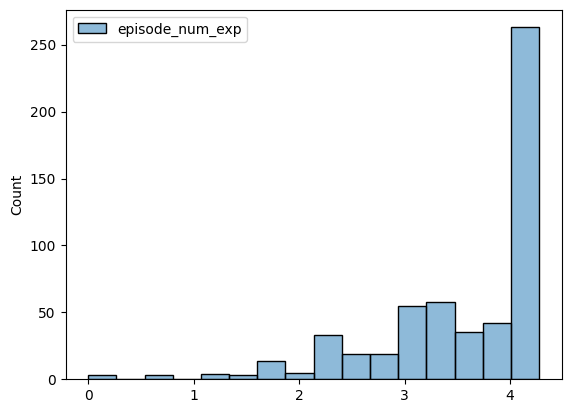

In [41]:
sns.histplot(y)

In [42]:
X = dead.drop(columns = ["episode_num", "season", "name"], axis=1)
X.head()

,male,origin,isMarried,isNoble,popularity
0,1,House Targaryen,0,0,0.605351
1,1,House Frey,1,1,0.896321
3,0,House Arryn,1,1,0.183946
5,1,House Baratheon,0,0,1.000000
6,1,House Targaryen,1,1,0.431438


In [43]:
cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer([
    ('cat_transformer', cat_transformer, ['origin'])],
    remainder = 'passthrough'
)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
X_train.columns

Index(['male', 'origin', 'isMarried', 'isNoble', 'popularity'], dtype='object')

In [46]:
X_train

,male,origin,isMarried,isNoble,popularity
1400,1,Wildling,0,0,0.026756
1303,1,Night's Watch,0,0,0.013378
1613,1,Wildling,0,1,0.140468
1268,0,Foreign Noble,0,1,0.013378
1206,1,House Baratheon,0,1,0.063545
...,...,...,...,...,...
287,1,House Targaryen,0,0,0.000000
461,0,House Stark,1,1,0.096990
1222,1,House Stark,0,1,0.063545
1700,1,House Stark,0,0,0.056856


In [47]:
pipe = make_pipeline(preprocessor, LinearRegression())

In [48]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_transformer',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['origin'])])),
                ('linearregression', LinearRegression())])

In [49]:
type(pipe)

sklearn.pipeline.Pipeline

In [50]:
#X_test_transformed = preprocessor.transform(X_test)

In [51]:
#X_test_transformed

In [52]:
pipe.score(X_test, y_test)

0.0028647603732823157

In [28]:
cv_results = cross_validate(pipe, X_train, y_train, cv=5, scoring="r2")#"neg_mean_absolute_error")

In [29]:
cv_results['test_score'].mean()

-0.07069063062264555

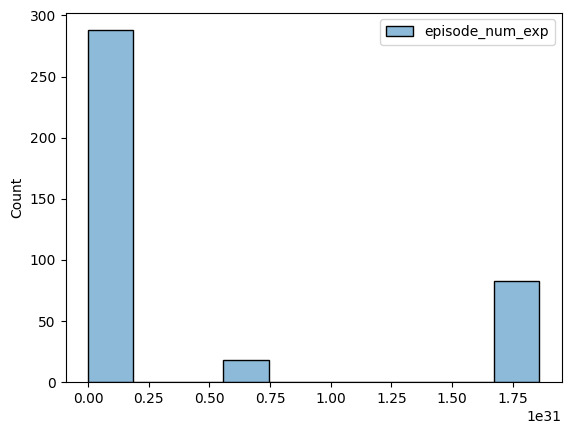

In [30]:
sns.histplot(y_train);

In [ ]:
len(y_train)

In [ ]:
y_pred = pipe.predict(X_train)
plt.scatter(range(len(y_train)), y_pred)
plt.scatter(range(len(y_train)), y_train)
plt.show()

In [ ]:
print(X)

In [ ]:
pipe.fit(X, y)

In [ ]:
train_sizes = [25, 50, 75, 100, 150, 200, 250, 300, 350]

train_sizes, train_scores, test_scores = learning_curve(
    estimator=LinearRegression(), X=X, y=y, train_sizes=train_sizes, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

print(train_scores_mean)
print(test_scores_mean)

plt.figure(figsize=(10, 6))

plt.plot(train_sizes, train_scores_mean, label='Training score', marker='o')
plt.plot(train_sizes, test_scores_mean, label='Test score', marker='o')

plt.title('Learning Curves', fontsize=18)
plt.xlabel('Training Set Size', fontsize=14)
plt.ylabel('R-squared', fontsize=14)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Reference line at y=0 for R-squared
plt.legend()
plt.grid(True)
plt.show()